# Ridge Regression - Chance of Graduate Admission

In this notebook, we will take a dataset from Kaggle on chances of admission to graduate programs. The data contains the following information: 

- Serial No.: A way to keep track of entries, goes from 1 to the length of the dataset
- GRE Score: What the score the applicant recieved from the GRE
- TOEFL Score: What score the applicant recieved from the TOEFL
- University Rating: On a scale of 5 how prestigous the University is that the applicant is applying to
- SOP: The length of the statement of purpose on a scale of 5
- LOR: The strength of the letters of recommendation
- CGPA: The undergradate GPA of the applicant on a scale of 10
- Research: Whether the applicant has research experience. 1 if yes, 0 if no
- Chance of Admit: The chance they will be admitted to that graduate program

Given this data, we will build a ridge regression model that can take data and predict the chance of admission.  We will measure it's accuracy using the mean squared error and the R-squared value.

### Contents 

- Exploring the Data
- Modeling
- Conclusion

## Exploring the Data

In [17]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

Let's load our data and take a look at everything.

In [18]:
df = pd.read_csv('admissions_data.csv')

In [19]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [21]:
features = df.iloc[:,1:-1]
#features = pd.get_dummies(features1, columns = ['University Rating', 'SOP', 'LOR ', 'Research'])

labels = df.iloc[:,-1]

In [22]:
features.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [23]:
labels.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

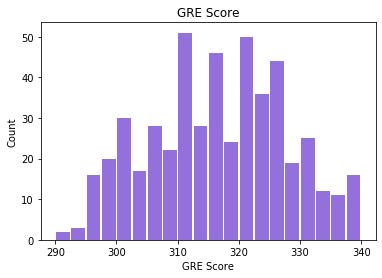

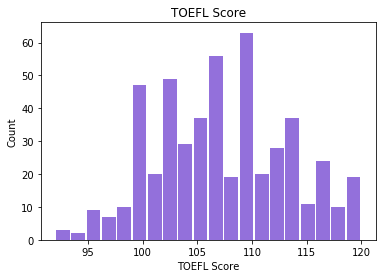

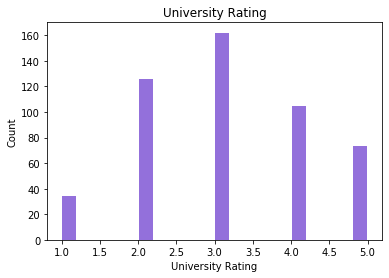

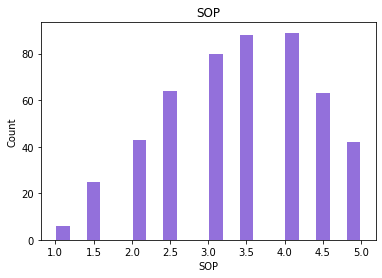

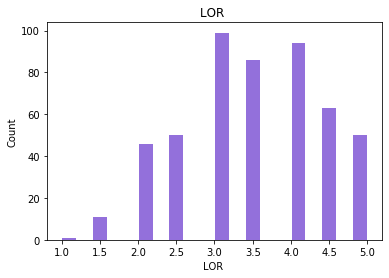

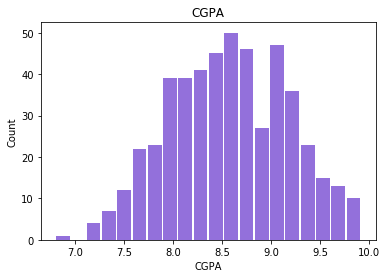

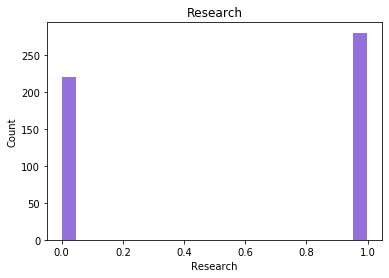

<Figure size 432x288 with 0 Axes>

In [24]:
for i in features:
    plt.hist(df[i], bins = 20,rwidth = 0.9, color = 'mediumpurple')
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("Count")
    
    plt.show()
    plt.clf()

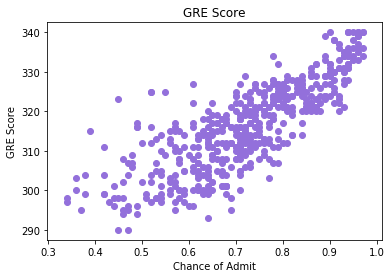

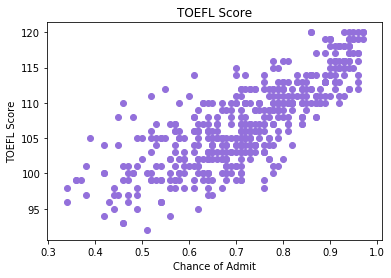

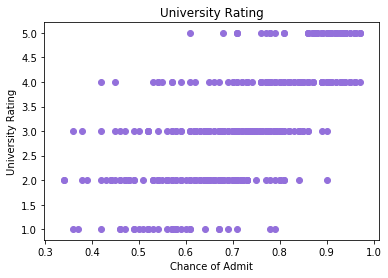

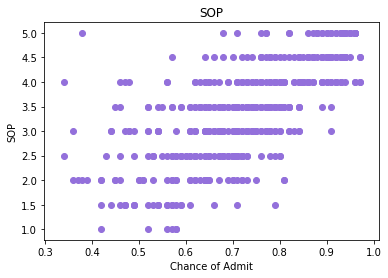

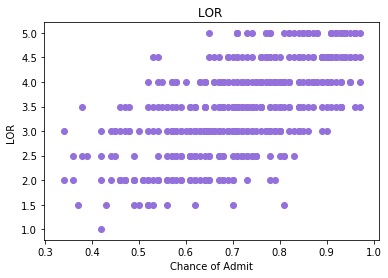

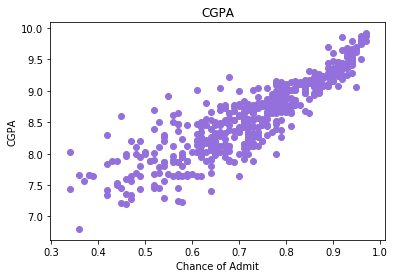

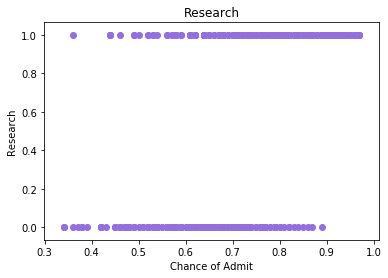

<Figure size 432x288 with 0 Axes>

In [25]:
for i in features:
    plt.scatter(labels, df[i], color = 'mediumpurple')
    plt.title(i)
    plt.xlabel("Chance of Admit")
    plt.ylabel(i)
    
    plt.show()
    plt.clf()

For all of these metrics, we see a postive correlation, which is expected. As test scores or GPA or strength of recommendation letters or length of statement of purpose increase, we would expect there to be a higher likelihood of admission.

## Modeling

First let's split up our testing and training data.

In [12]:
features_training, features_testing, labels_training, labels_testing = train_test_split(features, labels, test_size = 0.2)

Then we will make and train our model.

In [26]:
model = Ridge()
model.fit(features_training, labels_training)
predictions = model.predict(features_testing)

Let's check the accuracy.

In [27]:
print('Test Accuracy of Ridge Regression: ',round(100*model.score(features_testing, labels_testing),2),'%')
print('')
print('Train Accuracy of Ridge Regression:',round(100*model.score(features_training, labels_training),2),'%')
print('')
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(labels_testing,predictions)),4))
print('')
print('R-squared Value: ',round(r2_score(labels_testing,predictions)))

Test Accuracy of Ridge Regression:  77.57 %

Train Accuracy of Ridge Regression: 83.22 %

Mean Squared Error (MSE):  0.0668

R-squared Value:  1.0


## Conclusion

We were able to very accurately train a model to predict the chances of admission, resulting in an $R^{2}$ value of 1.0, which is as good as it can be, a MSE of 0.668 and a test accuracy of 77.57%